In [3]:
import pickle
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle
from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from io import StringIO
from IPython.display import Image
import pandas as pd

In [4]:
import matminer
from matminer.featurizers.conversions import StrToComposition
from matminer.featurizers.composition import ElementProperty
import pandas as pd

In [5]:
# dataset= r'all3_clf_0.1-3.csv'
# formula_perovskite=pd.DataFrame(pd.read_csv(dataset))
# formula_perovskite

,Unnamed: 0,MagpieData mean Number,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData mean MendeleevNumber,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,...,93,94,95,96,97,98,99,100,101,Adsorption energy(ev)
0,204,22.285714,3,82,79,17.061224,17,65.571429,1,94,...,0,0,0,0,0,0,0,0,0,0
1,540,14.000000,9,32,23,6.000000,9,65.142857,2,94,...,0,0,0,0,0,0,0,0,0,0
2,201,22.285714,3,82,79,17.061224,17,65.571429,1,94,...,0,0,0,0,0,0,0,0,0,0
3,84,17.714286,3,82,79,18.367347,9,65.000000,1,93,...,0,0,0,0,0,0,0,0,0,0
4,92,20.000000,9,82,73,17.714286,9,65.285714,2,93,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,55,15.428571,9,50,41,9.877551,9,65.142857,2,93,...,0,0,0,0,0,0,0,0,0,0
636,15,12.857143,9,32,23,5.469388,9,65.000000,2,93,...,0,0,0,0,0,0,0,0,0,0
637,47,13.142857,3,50,47,10.530612,9,64.857143,1,93,...,0,0,0,0,0,0,0,0,0,0
638,535,11.714286,3,32,29,7.306122,9,64.857143,1,94,...,0,0,0,0,0,0,0,0,0,0


In [4]:
str_to_comp = StrToComposition(target_col_id='composition')
df_comp = str_to_comp.featurize_dataframe(formula_perovskite, col_id='Name')

StrToComposition:   0%|          | 0/640 [00:00<?, ?it/s]

In [5]:
df_comp.head()

,Name,composition
0,Li2GeF4,"(Li, Ge, F)"
1,Li2GeF4,"(Li, Ge, F)"
2,Li2GeF4,"(Li, Ge, F)"
3,Li2GeF4,"(Li, Ge, F)"
4,Li2GeF4,"(Li, Ge, F)"


In [6]:
features = ['Number', 'MendeleevNumber', 'AtomicWeight', 'MeltingT', 
            'Column', 'Row', 'CovalentRadius', 'Electronegativity', 
            'NsValence', 'NpValence', 'NdValence', 'NfValence', 'NValence', 
            'NsUnfilled', 'NpUnfilled', 'NdUnfilled', 'NfUnfilled', 'NUnfilled', 
            'GSvolume_pa', 'GSbandgap', 'GSmagmom', 'SpaceGroupNumber']

stats = ['mean','minimum', 'maximum', 'range', 'avg_dev', 'mode']

featurizer = ElementProperty(data_source='magpie',
                             features=features,
                             stats=stats)

In [13]:
df_features = featurizer.featurize_dataframe(df_comp, col_id='composition')
df_features=df_features.iloc[:,2:-1] 
df_features.head()

ElementProperty:   0%|          | 0/640 [00:00<?, ?it/s]

,MagpieData mean Number,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData mean MendeleevNumber,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData mean SpaceGroupNumber,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber
0,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,106.142857,15.0,229.0,214.0,104.163265
1,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,106.142857,15.0,229.0,214.0,104.163265
2,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,106.142857,15.0,229.0,214.0,104.163265
3,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,106.142857,15.0,229.0,214.0,104.163265
4,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,106.142857,15.0,229.0,214.0,104.163265


In [14]:
df_features.to_csv('1_magpie.csv')

In [ ]:
#读取自己准备的元素特征（文广）

In [21]:
dataset2= r'Wenguang_TrainTest.csv'
HWG = pd.DataFrame(pd.read_csv(dataset2))
HWG

,A1 NumberofProtons,A2 NumberofProtons,B NumberofProtons,X1 NumberofProtons,X2 NumberofProtons,X3 NumberofProtons,X4 NumberofProtons,Ion NumberofProtons,A1 NumberofNeutrons,A2 NumberofNeutrons,...,X4 AtomicMass,Ion AtomicMass,A1 Melting Point,A2 Melting Point,B Melting Point,X1 Melting Point,X2 Melting Point,X3 Melting Point,X4 Melting Point,Ion Melting Point
0,3,3,32,9,9,9,9,3,4,4,...,18.998,6.941,453.85,453.85,1211.45,53.63,53.63,53.63,53.63,453.85
1,3,3,32,9,9,9,9,30,4,4,...,18.998,65.380,453.85,453.85,1211.45,53.63,53.63,53.63,53.63,692.88
2,3,3,32,9,9,9,9,19,4,4,...,18.998,39.098,453.85,453.85,1211.45,53.63,53.63,53.63,53.63,336.50
3,3,3,32,9,9,9,9,11,4,4,...,18.998,22.990,453.85,453.85,1211.45,53.63,53.63,53.63,53.63,371.15
4,3,3,32,9,9,9,9,13,4,4,...,18.998,26.982,453.85,453.85,1211.45,53.63,53.63,53.63,53.63,933.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,37,37,50,18,18,53,53,11,48,48,...,126.904,22.990,312.79,312.79,505.21,266.05,266.05,386.65,386.65,371.15
636,37,37,50,18,18,53,53,13,48,48,...,126.904,26.982,312.79,312.79,505.21,266.05,266.05,386.65,386.65,933.40
637,37,37,50,18,18,53,53,20,48,48,...,126.904,40.078,312.79,312.79,505.21,266.05,266.05,386.65,386.65,1112.15
638,37,37,50,18,18,53,53,12,48,48,...,126.904,24.305,312.79,312.79,505.21,266.05,266.05,386.65,386.65,923.15


In [22]:
HWG.to_csv('2_Mannual.csv')

In [ ]:
# One-hot from matminer

In [28]:
import pandas as pd
from matminer.featurizers.composition.element import ElementFraction
from pymatgen.core import Composition
ef = ElementFraction()
list4 = list(map(lambda x: Composition(x), formula_perovskite.iloc[:,0]))
data7 = pd.DataFrame()
for i in range(0, len(formula_perovskite.index)):
    data7 = pd.concat([data7, pd.DataFrame(ef.featurize(list4[i])).T])
data8 = data7.reset_index()
data8 = data8.iloc[:,1:-1] 
data8

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.571429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.571429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.571429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.571429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.571429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
636,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
element_fraction_labels = ef.feature_labels()
# 特征存入pydel_featurizer.csv
data8.to_csv("3_OneHot.csv")
pd.DataFrame(element_fraction_labels).T

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,H,He,Li,Be,B,C,N,O,F,Ne,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr


In [50]:
# merge 3 feature csv: df_features    HWG    data8

In [36]:
merge_feature = pd.concat([df_features, HWG, data8], axis=1)
merge_feature

,MagpieData mean Number,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData mean MendeleevNumber,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,92,93,94,95,96,97,98,99,100,101
0,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
636,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# read target

In [49]:
targetcsv = r'target.csv'
target = pd.DataFrame(pd.read_csv(targetcsv)).iloc[:,-1]
target = pd.DataFrame(target)
target

,Adsorption energy(ev)
0,-7.004905
1,0.395232
2,-6.580689
3,-5.557395
4,2.608437
...,...
635,-1.934356
636,-0.151069
637,-4.757395
638,-0.462000


In [ ]:
# merge features and target

In [53]:
data = pd.concat([merge_feature, target], axis=1)
data

,MagpieData mean Number,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData mean MendeleevNumber,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,93,94,95,96,97,98,99,100,101,Adsorption energy(ev)
0,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.004905
1,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.395232
2,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.580689
3,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.557395
4,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.608437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.934356
636,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.151069
637,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.757395
638,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.462000


In [71]:
data.to_csv('all3_data.csv')

In [54]:
# 获取空值的位置信息并打印
for i in range(len(data_all)):
    for j in range(len(data_all.columns)):
        if pd.isna(data_all.iloc[i, j]) or (pd.notna(data_all.iloc[i, j]) and str(data_all.iloc[i, j]).strip() == ''):
            print('第{}行、第{}列存在空值'.format(i+1, j+1))

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
all_Data=data.iloc[:,:]
global corMat
corMat = pd.DataFrame(all_Data.corr())  #corr 求相关系数矩阵
corMat.to_csv('./outputs_4/heatmap-before.csv')
plt.figure(figsize=(20, 30))
sns.heatmap(corMat, annot=False, vmax=1, square=True, cmap="Blues",linewidths=0)
plt.savefig('./outputs_4/heatmap-before.png', dpi=300, bbox_inches = 'tight')
plt.close()

In [56]:
# 使用随机森林的rfe:RandomForestRegressor()
from sklearn import preprocessing
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestRegressor
import csv
import numpy as np

# 输入数据归一化
X = data.values[:, :-1]
for i in range(X.shape[1]):
    X[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X[:, [i]])
y = data.values[:, -1]  # 目标数值

# rfe步骤
remain_number = 30
model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select=remain_number, step=1)
rfe_X = rfe.fit_transform(X, y)
print("Whether features are selected：\n", rfe.support_)                                          # ndarray
print("Feature size:", rfe_X.shape)                                           # tuple
list1 = rfe.support_.tolist()

# 打印rfe后的特征，但可能包含空值
import pandas as pd
Features_0 = pd.DataFrame(data=data.iloc[:, :-1].columns, columns=['Features'])
Features_0
Features_rfe = pd.DataFrame(data=rfe.support_, columns=['whether selected'])
Features_rfe
#     pd.options.display.max_rows=None
p = pd.concat([Features_0, Features_rfe], axis=1)
q = p[p['whether selected']>0]
r = q.reset_index(drop=True)
global s_rfe
s_rfe = pd.DataFrame(data=data,columns=r.Features.values)
global target
target = pd.DataFrame(data=data.iloc[:,-1])
# target = pd.DataFrame(data, columns=['Potential (v)'])
global data_rfe
data_rfe = pd.concat([s_rfe,target], axis=1)
print("Final features (s_rfe):", r.Features.values)                                        # ndarray
print("target:", target)
print("data after rfe feature selection (data_rfe):", data_rfe)

list2 = r.Features.values.tolist()

# print全输出
with open("data.txt", "w") as f:
    #f.write("特征是否被选中：\n")
    f.write("Whether the feature is selected:\n")
    for i in range(len(list1)):
        f.write(str(list1[i])+' ')
    #f.write("\n获取的数据特征尺寸：\n")
    f.write("\nAcquired data feature size:\n")
    f.write('(%s,%s)' % rfe_X.shape)
    #f.write("\n最后的特征s_rfe：\n")
    f.write("\nS_rfe(Final feature)：\n")
    for i in range(len(list2)):
        f.write(str(list2[i]) + '\n')
target.to_csv("target.csv")
data_rfe.to_csv("data_rfe.csv")

Whether features are selected：
 [ True  True False  True False False  True False False False  True False
  True False False  True  True False  True False False False  True False
 False False False False False False  True False False False False False
  True False False False  True False  True False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False  True  True  True False  True False False False  True False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False False False  True False
 False False False 

In [57]:
data_rfe

,MagpieData mean Number,MagpieData minimum Number,MagpieData range Number,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mean AtomicWeight,MagpieData range AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,...,Ion NumberofProtons,Ion NumberofNeutrons,Ion Number of Shells,Ion Specific Heat,Ion Density,Ion AtomicRadius,Ion Firstlonization,Ion AtomicMass,Ion Melting Point,Adsorption energy(ev)
0,10.571429,3.0,29.0,64.714286,36.408163,23.216516,65.69900,14.120995,333.254286,319.719184,...,3,4,2,3.582,0.5340,2.10,5.3917,6.941,453.85,-7.004905
1,10.571429,3.0,29.0,64.714286,36.408163,23.216516,65.69900,14.120995,333.254286,319.719184,...,30,35,4,0.388,7.1300,1.50,9.3942,65.380,692.88,0.395232
2,10.571429,3.0,29.0,64.714286,36.408163,23.216516,65.69900,14.120995,333.254286,319.719184,...,19,20,4,0.757,0.8620,2.80,4.3407,39.098,336.50,-6.580689
3,10.571429,3.0,29.0,64.714286,36.408163,23.216516,65.69900,14.120995,333.254286,319.719184,...,11,12,3,1.228,0.9710,2.20,5.1391,22.990,371.15,-5.557395
4,10.571429,3.0,29.0,64.714286,36.408163,23.216516,65.69900,14.120995,333.254286,319.719184,...,13,14,3,0.897,2.7000,1.80,5.9858,26.982,933.40,2.608437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,37.714286,17.0,36.0,66.857143,35.918367,87.765791,91.45147,31.206162,320.985714,90.235102,...,11,12,3,1.228,0.9710,2.20,5.1391,22.990,371.15,-1.934356
636,37.714286,17.0,36.0,66.857143,35.918367,87.765791,91.45147,31.206162,320.985714,90.235102,...,13,14,3,0.897,2.7000,1.80,5.9858,26.982,933.40,-0.151069
637,37.714286,17.0,36.0,66.857143,35.918367,87.765791,91.45147,31.206162,320.985714,90.235102,...,20,20,4,0.647,1.5400,2.20,6.1132,40.078,1112.15,-4.757395
638,37.714286,17.0,36.0,66.857143,35.918367,87.765791,91.45147,31.206162,320.985714,90.235102,...,12,12,3,1.023,1.7400,1.70,7.6462,24.305,923.15,-0.462000


In [58]:
s_rfe

,MagpieData mean Number,MagpieData minimum Number,MagpieData range Number,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mean AtomicWeight,MagpieData range AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,...,MagpieData avg_dev GSbandgap,Ion NumberofProtons,Ion NumberofNeutrons,Ion Number of Shells,Ion Specific Heat,Ion Density,Ion AtomicRadius,Ion Firstlonization,Ion AtomicMass,Ion Melting Point
0,10.571429,3.0,29.0,64.714286,36.408163,23.216516,65.69900,14.120995,333.254286,319.719184,...,0.902367,3,4,2,3.582,0.5340,2.10,5.3917,6.941,453.85
1,10.571429,3.0,29.0,64.714286,36.408163,23.216516,65.69900,14.120995,333.254286,319.719184,...,0.902367,30,35,4,0.388,7.1300,1.50,9.3942,65.380,692.88
2,10.571429,3.0,29.0,64.714286,36.408163,23.216516,65.69900,14.120995,333.254286,319.719184,...,0.902367,19,20,4,0.757,0.8620,2.80,4.3407,39.098,336.50
3,10.571429,3.0,29.0,64.714286,36.408163,23.216516,65.69900,14.120995,333.254286,319.719184,...,0.902367,11,12,3,1.228,0.9710,2.20,5.1391,22.990,371.15
4,10.571429,3.0,29.0,64.714286,36.408163,23.216516,65.69900,14.120995,333.254286,319.719184,...,0.902367,13,14,3,0.897,2.7000,1.80,5.9858,26.982,933.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,37.714286,17.0,36.0,66.857143,35.918367,87.765791,91.45147,31.206162,320.985714,90.235102,...,0.870612,11,12,3,1.228,0.9710,2.20,5.1391,22.990,371.15
636,37.714286,17.0,36.0,66.857143,35.918367,87.765791,91.45147,31.206162,320.985714,90.235102,...,0.870612,13,14,3,0.897,2.7000,1.80,5.9858,26.982,933.40
637,37.714286,17.0,36.0,66.857143,35.918367,87.765791,91.45147,31.206162,320.985714,90.235102,...,0.870612,20,20,4,0.647,1.5400,2.20,6.1132,40.078,1112.15
638,37.714286,17.0,36.0,66.857143,35.918367,87.765791,91.45147,31.206162,320.985714,90.235102,...,0.870612,12,12,3,1.023,1.7400,1.70,7.6462,24.305,923.15


In [59]:
target

,Adsorption energy(ev)
0,-7.004905
1,0.395232
2,-6.580689
3,-5.557395
4,2.608437
...,...
635,-1.934356
636,-0.151069
637,-4.757395
638,-0.462000


In [60]:
X = data_rfe.values[:, :-1]
y = data_rfe.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [61]:
feature_names = list(data_rfe.columns[:-1])

In [62]:
# 定义符号回归模型，并使用训练数据拟合模型
reg = SymbolicRegressor(population_size=5000, generations=20, verbose=1,
                         function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 
                                       'inv', 'max', 'min', 'sin', 'cos', 'tan'],
                         metric='mean absolute error', stopping_criteria=0.001,
                         random_state=0)
reg.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     8.47          4.85023        3          1.97566              N/A     26.25s
   1     6.86          3.09517        3          1.97566              N/A     28.14s
   2     8.47          2.93412        9          1.91224              N/A     27.79s
   3     7.27          2.92309        6          1.63857              N/A     25.11s
   4     8.61          3.16284        9          1.49503              N/A     24.33s
   5     8.72          3.08711       10          1.39517              N/A     25.50s
   6    11.24          2.46458       12          1.37368              N/A     22.68s
   7    12.26          2.21781       15          1.26383              N/A     20.81s
   8    14.86           2.1518       27          1.19302              N/A  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min', 'sin', 'cos',
                                'tan'],
                  population_size=5000, random_state=0, stopping_criteria=0.001,
                  verbose=1)

In [63]:
from sklearn.metrics import mean_absolute_error
# 预测测试数据
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 1.0119515324547377


In [64]:
print(X_test.shape[1])

30


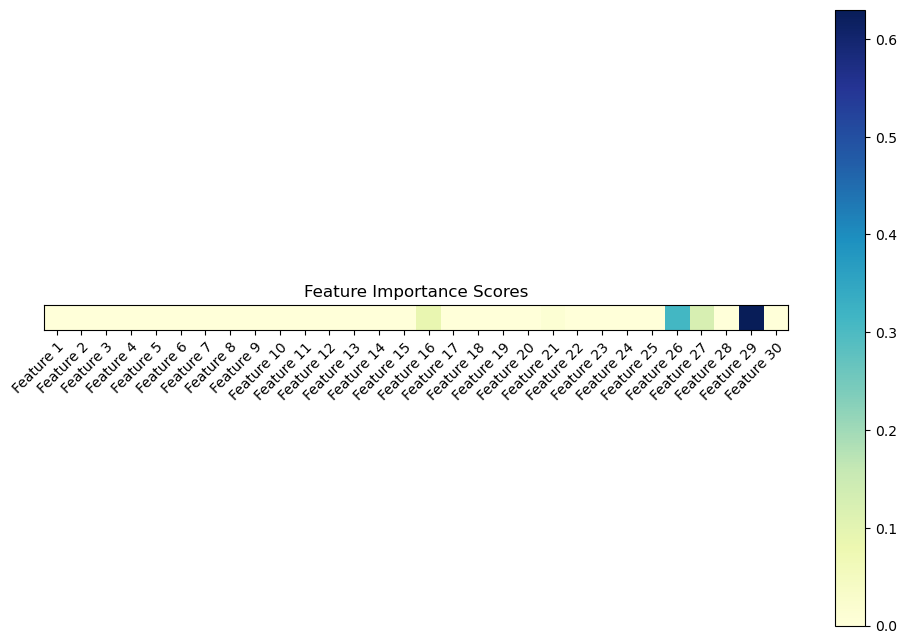

In [65]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Get feature-importance scores
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=0)

# Create a heatmap
fig, ax = plt.subplots(figsize=(12,8))
im = ax.imshow(result.importances_mean.reshape(1, -1), cmap='YlGnBu')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(np.arange(len(result.importances_mean)))
ax.set_xticklabels([f"Feature {i+1}" for i in range(len(result.importances_mean))])
ax.set_yticks([])

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Set plot title and show plot
ax.set_title("Feature Importance Scores")
plt.show()
# 这个代码会创建一个热力图，显示特征重要性分数。
# x轴显示特征编号，每个单元格的颜色表示该特征的重要性分数，颜色越亮，意味着该特征对该模型越重要。

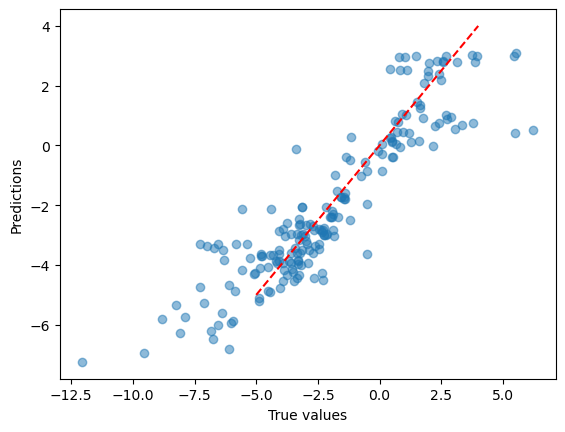

In [66]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(range(-5, 5), range(-5, 5), "r--")
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()
# 这个代码会创建一个散点图，显示模型的预测值与真实值之间的关系。
# x轴是真实值，y轴是预测值。如果模型预测完全准确，则所有点都将落在红色虚线上方，红色虚线表示完美预测的情况

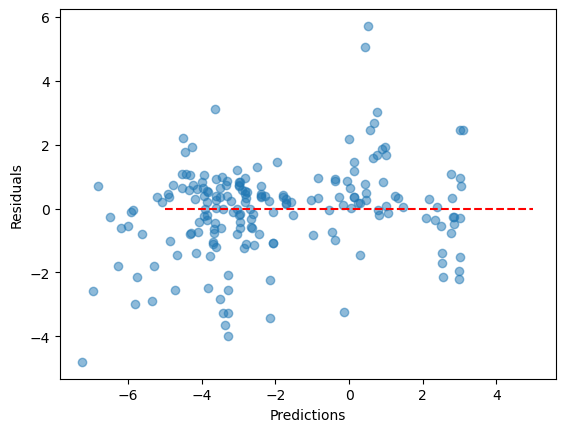

In [67]:
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.hlines(y=0, xmin=-5, xmax=5, colors='r', linestyles='--')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()
# 这个代码将创建一个散点图，表示预测值和残差之间的关系。
# x轴是预测值，y轴是残差。如果模型的预测值能够准确地预测目标变量，残差应该随机分布在0附近。

In [ ]:
# X = data_rfe.values[:, :-1]
# y = data_rfe.values[:, -1]
# X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)


# for i in range(X_train.shape[1]):
#     X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



# for i in range(X_test.shape[1]):
#     X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [69]:
from sklearn.metrics import mean_absolute_error
# 预测测试数据
X_pred = reg.predict(X_train)
mae_train = mean_absolute_error(y_train, X_pred)
print("MAE:", mae_train)

MAE: 0.9658287669853204


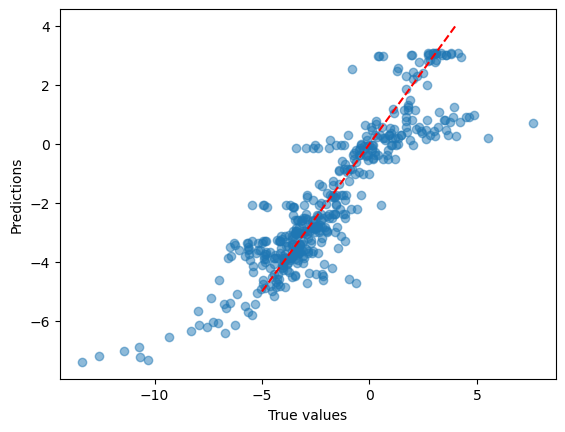

In [70]:
import matplotlib.pyplot as plt

plt.scatter(y_train, X_pred, alpha=0.5)
plt.plot(range(-5, 5), range(-5, 5), "r--")
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()